In [1]:
import karstnet as kn
import networkx as nx
import numpy as np

In [2]:
#load graph graph data
G = kn.from_therion_sql_enhanced('../data/Migovec.sql',
                                cavename = 'Migovec', 
                                crs = 'epsg:3912', 
                                rights = 'CC-BY-NC-SA 4.0',
                                citation = 'ICCC, & JSDPT. (2024). Survey Data for the Tolminski Migovec Cave Exploration project (Version 2024.03.13) [Dataset]. Zenodo. https://doi.org/DOI: 10.5281/ZENODO.108130')
# G = kn.from_therion_sql_enhanced('../data/BreznoNaToscu.sql')

H = G.copy()
kn.remove_flagged_edges(H)

disco_keys = kn.find_disconnected_node(G, H)

Therion Import -- Importing all links (including splays) -- 0.4155597686767578s
Therion Import -- Importing all nodes data (including splays) -- 0.43192362785339355s
Therion Import -- Create initial graph with all the data points (including splays) -- 0.49908971786499023s
Therion Import -- Combine Stations with identical x,y,z -- 0.6293799877166748s
0/7294 unique positions
1000/7294 unique positions
2000/7294 unique positions
3000/7294 unique positions
4000/7294 unique positions
5000/7294 unique positions
6000/7294 unique positions
7000/7294 unique positions
Therion Import -- Rename nodes -- 9.534615993499756s
0/7294 nodes to rename
1000/7294 nodes to rename
2000/7294 nodes to rename
3000/7294 nodes to rename
4000/7294 nodes to rename
5000/7294 nodes to rename
6000/7294 nodes to rename
7000/7294 nodes to rename
Therion Import -- concatenate old ic in a dictionnary -- 9.600112676620483s
Therion Import -- Relabel nodes -- 9.602110862731934s
Therion Import -- remove self links -- 9.620110

In [3]:

export_path = "../data/"
filename = G.graph['cavename']


# export the original dataset to compare
kn.export_to_gocad(G, data_type = 'lines', #or 'points'
                   properties = ['connected_component_number'],                       
                    name = export_path +'gocad_rawlines_'+filename
                    )

# export the clean line data
kn.export_to_gocad(H, data_type = 'lines', #or 'points'
                    name = export_path +'gocad_cleanlines_'+filename
                    )

# export the clean node data
kn.export_to_gocad(H, data_type = 'points', #or 'points'
                   properties = ['height', 'width'],
                    name = export_path +'gocad_cleanpoints_'+filename
                    )

#export the keys identified as disconnected
kn.export_to_gocad(H, data_type = 'points', #or 'points'
                    name = export_path +'gocad_disokeys_'+filename,
                    node_id = disco_keys
                    )


In [ ]:
I = kn.graph_to_branches(G)

#write lines containing pline information
#Gocad only read the pline right by single branch, with points in the right order
dataset = []
if nx.is_connected(I) == False:
    #iterate through the connectec components to find nodes where disconnection occured
    #search for the nodes that used to be degree >1 and are now degree 1.
    for i, subgraph_index in enumerate(nx.connected_components(I)):
        subgraph = nx.subgraph(I, subgraph_index)
        # print(subgraph)
        #segments
        seg = []
        nodes_deg1 = [node for node,degree in dict(subgraph.degree()).items() if degree ==1]
        # print(nodes_deg1)

        #make sure its not a loop
        #in the case of a segment in the form of a loop, 
        # here will be no node of degree 1, so we replace by the first node in the list

        if nodes_deg1:
            pass
            for path in nx.all_simple_edge_paths(subgraph, nodes_deg1[0],nodes_deg1[1]):
                for edge in path:   
                    # print(edge)
                    seg.append(" ".join(str(item) for item in edge)) 
        else:
            #create a new node at the intersection
            #take a random node in the loop:
            intersection = list(subgraph.nodes())[0]
            max_value = np.array(G.nodes()).max()
            cycle = subgraph.copy()
            cycle.add_node(max_value,   pos=cycle.nodes('pos')[intersection], 
                                    connected_component_number=cycle.nodes('connected_component_number')[intersection],
                                    intersection=intersection)  
            #create an edge that connects the new node
            node = list(cycle.neighbors(intersection))[0]
            cycle.add_edge(max_value,node) 
            #remove the old ege
            cycle.remove_edge(intersection,node)  

            seg = []
            nodes_deg1 = [node for node,degree in dict(cycle.degree()).items() if degree ==1]
            print(nodes_deg1)
            for path in nx.all_simple_edge_paths(cycle, nodes_deg1[0],nodes_deg1[1]):

                for edge in path:   
                    # print(edge) 
                    seg.append(" ".join(str(item) for item in edge)) 

[4960, 7293]
[(4960, 4317), (4317, 667), (667, 4399), (4399, 3416), (3416, 3173), (3173, 3401), (3401, 3810), (3810, 6361), (6361, 7293)]
[[1980, 2658, 583, 1118, 5707, 2563, 6132, 413, 3469, 5573, 1672, 5669, 5087, 5549, 3994, 3202, 546, 5705, 156, 3244, 4136, 5808, 6897], [5033, 5061, 3345, 1498, 4834, 1920, 5585, 1757, 3238, 2326, 4139, 308, 5092, 472, 1803, 3631, 5158, 46, 6373, 281, 1445, 497, 978, 7142, 447, 1635, 1090, 598, 4611, 3342, 1548, 505, 523, 6765, 2589, 6806, 735, 805, 5618, 6672, 5459, 2204, 1143, 5871, 4742, 6339, 6253, 6609, 128, 6579, 3480, 5079, 3018, 5920, 5163, 1698, 3335, 508, 3526, 4396, 7025, 2921, 194, 6669, 960, 2520, 3557, 4140, 5787, 699, 1521, 178, 6332, 2820, 188, 5270, 4073, 5235, 225, 4401, 6, 5256, 4728, 5353, 3965, 6286, 7227, 6614, 6060, 3592, 4437, 50, 276, 2038, 763, 3962, 1247], [6743, 3838, 3506, 6023, 3396, 3324], [3204, 418, 5931, 4163, 129, 982, 252, 5467, 4482, 6084, 2401, 6296, 3838], [3282, 3390, 4945, 4125], [5142, 8, 3163, 4409, 5461], 

In [23]:
list(subgraph.nodes())[0]

4960

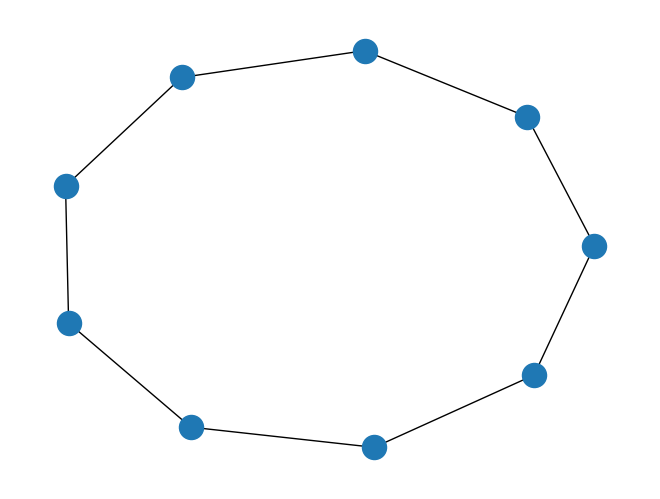

In [10]:
nx.draw(subgraph)

In [13]:
nodes_deg1 is []

False

In [15]:
if nodes_deg1:
    print('yes')

In [31]:
cycles = nx.simple_cycles(G)

In [34]:
len(sorted(nx.simple_cycles(G)))

3698

In [36]:
import numpy as np
np.array(G.nodes()).max()

7293

In [ ]:
        H = graph_to_branches(G)
        
        #write lines containing pline information
        #Gocad only read the pline right by single branch, with points in the right order
        dataset = []
        if nx.is_connected(H) == False:
            #iterate through the connectec components to find nodes where disconnection occured
            #search for the nodes that used to be degree >1 and are now degree 1.
            for i, subgraph_index in enumerate(nx.connected_components(H)):
                subgraph = nx.subgraph(H, subgraph_index)
                print(subgraph)
                #segments
                seg = []
                nodes_deg1 = [node for node,degree in dict(subgraph.degree()).items() if degree ==1]
                print(nodes_deg1)
                for path in nx.all_simple_edge_paths(subgraph, nodes_deg1[0],nodes_deg1[1]):
                    for edge in path:   
                        # print(edge)
                        seg.append(" ".join(str(item) for item in edge))            
                
                #nodes
                pvrtx = []
                for node in nx.shortest_path(subgraph, source=nodes_deg1[0], target=nodes_deg1[1]):               
                    #print(node)
                    #write coordinate string ex: '-6.53 -10.24 -28.11'
                    # print(subgraph.nodes('pos')[node])
                    string_coordinates = " ".join(str(item) for item in subgraph.nodes('pos')[node])
                    #write attribute string ex: 'att1 att2 atti'
                    string_attribute = ''
                    
                    for attribute in properties:
                        if subgraph.nodes(attribute)[node] is not None:
                            string_attribute += str(subgraph.nodes(attribute)[node]) + ' '
                        else:
                            # in the case there is no data
                            print('no properties for node: ', node )
                            string_attribute += nodata_value